# 均值滤波
## 原理回顾
均值滤波器是一种线性滤波器，对于一个$n\times n$（例如$3\times3$）的均值滤波器，其滤波器系数都是$$\frac{1}{n^{2}}$$
当它在图像上滑动时，以当前像素为中心的$n\times n$邻域内的像素灰度值相加后取平均值，作为新的当前像素的灰度值，计算公式为$$g(x,y)=\frac{1}{n^{2}}\sum_{i = - \frac{n - 1}{2}}^{ \frac{n - 1}{2}}\sum_{j = - \frac{n - 1}{2}}^{ \frac{n - 1}{2}}f(x + i,y + j)$$
通过这种方式可以减少图像中的噪声，但也可能导致边缘变得模糊。

In [3]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [6]:
def mean_filter(image, kernel_size):
    """
    对输入图像进行均值滤波
    :param image: 输入的图像（以灰度图形式，numpy数组表示）
    :param kernel_size: 滤波器的尺寸，例如(3, 3)表示3x3的滤波器
    :return: 均值滤波后的图像（numpy数组表示）
    """
    # 获取图像的高度和宽度
    height, width = image.shape[:2]
    t_filtered_image = [[0 for _ in range(width)] for _ in range(height)]
    # 获取滤波器的边长
    n = kernel_size[0]
    # 计算滤波器系数
    coefficient = 1 / (n ** 2)
    # 创建一个与原图像同尺寸的全零数组，用于存储滤波后的图像
    filtered_image = np.zeros_like(image)
    # 计算滤波器滑动时的边界范围
    half_n = n // 2
    for y in range(half_n, height - half_n):
        for x in range(half_n, width - half_n):
            sum_value = 0
            for i in range(-half_n, half_n + 1):
                for j in range(-half_n, half_n + 1):
                    sum_value += image[y + i][x + j]
            # 根据均值滤波公式计算新的像素值
            t_filtered_image[y][x] = coefficient * sum_value
    return t_filtered_image

## 代码解释
- **`mean_filter`函数**：
    - 该函数接受两个参数，`image`是输入的灰度图像，以二维的`numpy`数组形式传入（通过`cv2.imread`以灰度图模式读取图像得到的就是这种格式），`kernel_size`是表示滤波器尺寸的元组，例如`(3, 3)`表示一个\(3\times3\)的均值滤波器。
    - 在函数内部，首先通过`image.shape[:2]`获取图像的高度和宽度，接着从`kernel_size`中获取滤波器的边长`n`，并计算出滤波器系数`coefficient`（即\(\frac{1}{n^{2}}\)）。
    - 然后创建一个与原图像同尺寸的全零数组`filtered_image`，用于存储滤波后的图像数据。通过`n // 2`计算出滤波器滑动时在图像边界的范围`half_n`。
    - 接着使用嵌套的`for`循环来遍历图像中可以进行滤波操作的像素点（避开图像边界不足滤波器尺寸的部分），对于每个像素点，再通过两层嵌套的`for`循环遍历滤波器对应的邻域像素，将邻域内像素灰度值相加得到`sum_value`。
    - 根据均值滤波公式，用`coefficient * sum_value`计算得到新的像素值，并将其赋值给`filtered_image`对应位置的像素，完成对该像素的滤波操作。最后将`filtered_image`数组转换为8位无符号整数类型（`astype(np.uint8)`），使其符合图像像素值的常见数据类型要求并返回。

### 示例用法

Text(0.5, 1.0, 'Filtered Image')

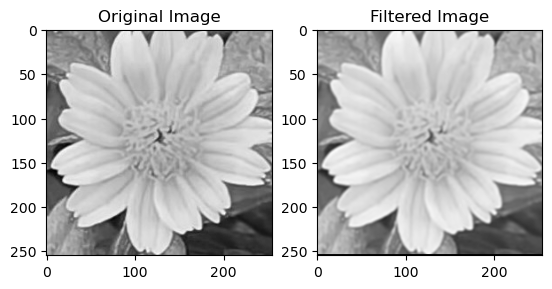

In [7]:
# 读取图像（以灰度图模式读取）
image = cv2.imread('flower.jpg', 0)

# 进行均值滤波，这里使用3x3的滤波器，你可以根据需要调整滤波器尺寸
filtered_image = mean_filter(image, (3, 3))

# 使用matplotlib在Jupyter Notebook中显示原始图像和滤波后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

`opencv-python`库本身也提供了现成的均值滤波函数（`cv2.blur`等），使用起来更加高效简洁，使用示例如下：

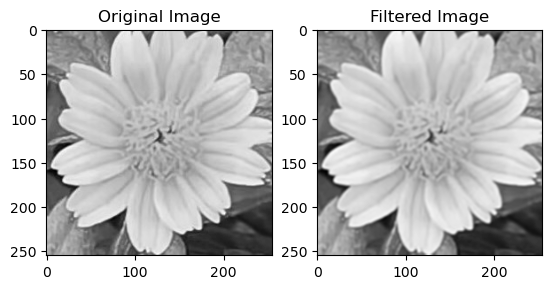

In [8]:
# 读取图像（以灰度图模式读取）
image = cv2.imread('flower.jpg', 0)

# 使用cv2.blur进行均值滤波，这里使用3x3的滤波器，你可以根据需要调整尺寸
filtered_image = cv2.blur(image, (3, 3))

# 使用matplotlib在Jupyter Notebook中显示原始图像和滤波后的图像
plt.subplot(1, 2, 1)
plt.imshow(image, cmap='gray')
plt.title('Original Image')

plt.subplot(1, 2, 2)
plt.imshow(filtered_image, cmap='gray')
plt.title('Filtered Image')

plt.show()